In [1]:
from ml_mmpa import master_functions
import pandas as pd

RDKit WARNING: [16:30:17] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
# carry out mmpa

# clean mmpa
    # first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands
    # Second step is finding unique transforms and calculating paired t-test
    # Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
    
# prodcue functions for mmpa
# summarise results in a table

### MMPA

In [3]:
import sys

def abc(xyz):
    print(xyz)

if __name__ == "__main__":
    abc(sys.argv[1])

-f


In [4]:
# in the console run: 

# ! ./ml_mmpa/master_mmpa.sh test_data/test_data.csv test

# it will result in new items in the 'out' folder.


In [5]:
# Next we process that output:

output = pd.read_csv('out/index_test_final.csv')

In [6]:
output.head(5)

,compound_structure_A,compound_structure_B,idsmiles_A,idsmiles_B,smirks,common_core,measurement_A,measurement_B,measurement_delta,LHS,RHS
0,CCOC(=O)/C(=C\Nc1cc(Br)c(OC)c(Br)c1)c1ccc(Cl)cc1,CCOC(=O)/C(=C\Nc1cc(Br)c(OC)c(Br)c1)c1ccc(OC)cc1,9235,5712,[*:1]c1ccc(Cl)cc1>>[*:1]c1ccc(OC)cc1,[*:1]/C(=C/Nc1cc(Br)c(OC)c(Br)c1)C(=O)OCC,4.00,3.99,-0.01,[*:1]c1ccc(Cl)cc1,[*:1]c1ccc(OC)cc1
1,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,1385,4315,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
2,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,1385,9440,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
3,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,6971,4315,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1
4,O=C1CNC(=O)/C1=C(\NC1CCCCC1)c1cccc2ccccc12,O=C1CNC(=O)/C1=C(\NCc1ccccc1)c1cccc2ccccc12,6971,9440,[*:1]NC1CCCCC1>>[*:1]NCc1ccccc1,[*:1]/C(=C1/C(=O)CNC1=O)c1cccc2ccccc12,4.02,4.03,0.01,[*:1]NC1CCCCC1,[*:1]NCc1ccccc1


In [7]:
# first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands

output_len = master_functions.clean_mmpa_pairs_len(output) # filter pairs by len LHS & RHS vs CORE

Initial number of transofrms: 111269 
Number fo transforms disqualified based on length discrepancy: 5974 
Remaining number of transforms: 105295


In [8]:
'''
Second step is finding unique transforms and calculating paired t-test
It will produce dataframe with columns: smirks	dof	t-stat	p-val (t-test)	measurement_delta	std	sem
Sorted by descending dof

At this point both positive and negative transforms are present.
'''
output_len_stat = master_functions.stat_it_2(output_len)

Number of unique transforms: 8938 
Processing transforms:...
 
1000
2000
3000
4000
5000
6000
7000
8000
done!


In [9]:
# you should save this file..pickle?

output_len_stat.head(5)

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem
0,[*:1]C>>[*:1][H],1052,7.063949,2.938877e-12,0.188386,0.865395,0.026669
1,[*:1]F>>[*:1][H],430,-0.540194,5.893426e-01,-0.027077,1.040596,0.050124
2,[*:1]Cl>>[*:1][H],270,0.700202,4.844038e-01,0.036605,0.860604,0.052278
3,[*:1]C>>[*:1]CC,262,0.518719,6.043943e-01,0.032357,1.011624,0.062379
4,[*:1]OC>>[*:1][H],239,0.483007,6.295327e-01,0.022292,0.714981,0.046152


In [10]:
'''
Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
Output is the significant transforms sorted by measurement delta

This is a great output to consider, but we can do one better by turning the transforms into functional groups
'''

mmpa_zero_pos = master_functions.zero_in(output_len_stat, 0.05, pos_only=True)

# Add split columns to the dataframe

mmpa_zero_pos = master_functions.split_transition(mmpa_zero_pos, 'smirks')


Number of unique transforms where p-val < 0.05 is 1395
Split between 1395 positive transforms and 0 negative transforms


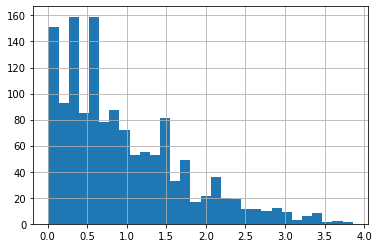

In [11]:
mmpa_zero_pos.measurement_delta.hist(bins=30)

In [12]:
mmpa_zero_pos.head(20)

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem,LHS,RHS
0,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@H](N)C1,2,14.405218,4.784480e-03,3.856667,0.463717,0.267727,[*:1]N1CCC2NC(=O)OC2C1,[*:1]N1CC[C@H](N)C1
1,[*:1]CC1CN([*:2])CC/C1=N\OC>>[*:1][C@H]1CCN([*...,2,8.241833,1.440420e-02,3.656667,0.768462,0.443672,[*:1]CC1CN([*:2])CC/C1=N\OC,[*:1][C@H]1CCN([*:2])C1
2,[*:1]/C(N)=N\OC>>[*:1]CN,11,22.028236,1.891645e-10,3.614167,0.568354,0.164070,[*:1]/C(N)=N\OC,[*:1]CN
3,[*:1]N1CCC2NC(=O)OC2C1>>[*:1]N1CC[C@@H](N)C1,2,13.172619,5.713748e-03,3.526667,0.463717,0.267727,[*:1]N1CCC2NC(=O)OC2C1,[*:1]N1CC[C@@H](N)C1
4,[*:1]/C(N)=N\OC>>[*:1]N,6,9.227650,9.142470e-05,3.455714,0.990822,0.374496,[*:1]/C(N)=N\OC,[*:1]N
5,[*:1]CC1(C)CN([*:2])C/C1=N/OC>>[*:1]C[C@@H]1CC...,2,6.482663,2.297841e-02,3.446667,0.920887,0.531675,[*:1]CC1(C)CN([*:2])C/C1=N/OC,[*:1]C[C@@H]1CCN([*:2])C1
6,[*:1]N1C/C(=N/OC)C([*:2])(C)C1>>[*:2][C@@H]1CC...,2,6.482663,2.297841e-02,3.446667,0.920887,0.531675,[*:1]N1C/C(=N/OC)C([*:2])(C)C1,[*:2][C@@H]1CCN([*:1])C1
7,[*:1]/C(N)=N\OCC>>[*:1]CN,7,19.373812,2.433879e-07,3.435000,0.501484,0.177301,[*:1]/C(N)=N\OCC,[*:1]CN
8,[*:1]/C(N)=N\OCC>>[*:1]N,2,4.900000,3.921569e-02,3.430000,1.212436,0.700000,[*:1]/C(N)=N\OCC,[*:1]N
9,[*:1]O/N=C1\CN([*:2])CCC1NC>>[*:1][C@@H]1CCN([...,5,10.149066,1.592310e-04,3.413333,0.823812,0.336320,[*:1]O/N=C1\CN([*:2])CCC1NC,[*:1][C@@H]1CCN([*:2])C[C@H]1N


In [13]:
# features_all_neg, l_feats_neg, r_feats_neg = master_functions.calculate_fractions_mk4(mmpa_zero_pos)


In [14]:
# features_all_neg

NameError: name 'features_all_neg' is not defined

In [15]:
features_2_all_neg, l_feats_2_neg, r_feats_2_neg = master_functions.calculate_fractions_mk5(mmpa_zero_pos)


  1%|          | 10/1395 [00:00<00:15, 89.13it/s]

/cluster/uz_lab/dgurvic/git_projects/ml_mmpa
Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


100%|██████████| 1395/1395 [00:15<00:00, 87.58it/s]


In [ ]:
features_2_all_neg

In [16]:
# to_drop = ['arene', 'heteroarene', 'alkyne', 'benzene ring', 'amine', 'azaarene', 'alkene', 'aryl halide', 'alkyl halide', 'leaving group', 'alkenyl halide']

# features_all_dropped_neg = features_2_all_neg.drop(to_drop, axis = 1)

# l_feats_dropped_neg =  l_feats_neg.drop(to_drop, axis = 1)
# r_feats_dropped_neg =  r_feats_neg.drop(to_drop, axis = 1)

# fractions_to_drop=['fr_ketone_Topliss', 'fr_Al_OH_noTert', 'fr_Ar_N', 'fr_methoxy', 'fr_C_O', 'fr_phenol_noOrthoHbond' ]
# fractions above are kept as significant but not looked at on the exchange

fr_sig_descriptors_neg = master_functions.find_sig_feats_mk2(l_feats_2_neg, r_feats_2_neg, 0.01)

Found significant fractions:  60


In [18]:
fr_sig_descriptors_neg

,14 - Primary amine,2 - Olefin group,20 - COOH,25 - Aromatic chloro,"37 - Cl, double bonded carbon",41 - Acrylate,46 - CON,48 - CH2S,4-chlorobenzene,56 - Aromatic bromo,...,sp3 hybridized carbon atoms (3),sp3 hybridized carbon atoms (4),sp3 hybridized carbon atoms (7),sp3 hybridized carbon atoms (8),Sulphur atom (2),Sulphur atom (3),Sulphur atom (6),Three-membered heterocycle,Vinyl michael acceptor1,Vinyl_halide
0,5.469007e-13,0.000199,0.001046,2.147132e-07,0.004641,0.004641,1.816064e-07,1.956614e-13,2.147132e-07,0.002256,...,0.001739,1.956614e-13,3.476256e-07,0.000001,0.000032,1.098568e-07,1.624613e-10,0.004641,0.008105,0.004641
1,7.282262e+00,-3.730265,-3.284733,-5.212185e+00,-2.835555,-2.835555,5.243763e+00,7.424919e+00,-5.212185e+00,3.059983,...,-3.137616,7.424919e+00,-5.120353e+00,4.865058,4.170429,5.337539e+00,6.441509e+00,-2.835555,-2.651464,-2.835555


In [17]:

fractions_to_drop=[]
res_neg_neg= master_functions.results_arr(fr_sig_descriptors_neg, fr_sig_descriptors_neg, r_feats_2_neg, l_feats_2_neg, fractions_to_drop )

14 - Primary amine has positive correlation 


AttributeError: 'DataFrame' object has no attribute 'target'